# Implementing non-max suppression

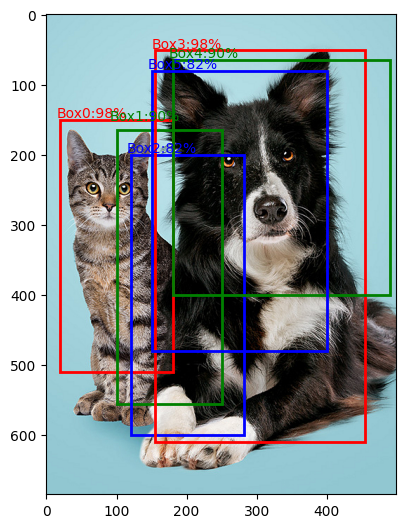

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Reading the image
image = plt.imread('cat_dog.jpg')

# drawing emtpy figure
fig = plt.figure()

# defining the axis
ax = fig.add_axes([0, 0, 1, 1])

# ploting the image
plt.imshow(image)
      
# creating rectangular patch for cat
rect_0 = patches.Rectangle((20, 150), 160, 360, edgecolor='red', facecolor='none', linewidth=2)
rect_1 = patches.Rectangle((100, 165), 150, 390, edgecolor='green', facecolor='none', linewidth=2)
rect_2 = patches.Rectangle((120, 200), 162, 400, edgecolor='blue', facecolor='none', linewidth=2)

# creating rectangular patch for dog
rect_3 = patches.Rectangle((155, 50), 300, 560, edgecolor='red', facecolor='none', linewidth=2)
rect_4 = patches.Rectangle((180, 65), 310, 335, edgecolor='green', facecolor='none', linewidth=2)
rect_5 = patches.Rectangle((150, 80),250,400, edgecolor='blue', facecolor='none', linewidth=2)
    
# adding the patches for cat
ax.add_patch(rect_0)
ax.text(15, 146, 'Box0:98%', color='red')
ax.add_patch(rect_1)
ax.text(90, 150, 'Box1:90%', color='green')
ax.add_patch(rect_2)
ax.text(115, 196, 'Box2:82%', color='blue')

# adding the patches for dog
ax.add_patch(rect_3)
ax.text(150, 48, 'Box3:98%', color='red')
ax.add_patch(rect_4)
ax.text(175, 60, 'Box4:90%', color='green')
ax.add_patch(rect_5)
ax.text(145, 76, 'Box5:82%', color='blue')

# Displaying the image
plt.show()

For this image, we are going to use the non-max suppression function nms() from the torchvision library. This function requires three parameters-

Boxes: bounding box coordinates in the x1, y1, x2, y2 format

Scores: Objectiveness score for each bounding box

iou_threshold: the threshold for the overlap (or IOU)

Here, since the above coordinates are in x1, y1, width, height format, we will determine the x2, y2 in the following manner-

x2 = x1 + width

y2 = y1 + height

In [39]:
!pip install torch


     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.3 MB 1.3 MB/s eta 0:02:15
     -------------------------------------- 0.0/172.3 MB 326.8 kB/s eta 0:08:48
     -------------------------------------- 0.1/172.3 MB 819.2 kB/s eta 0:03:31
     -------------------------------------- 0.2/172.3 MB 762.6 kB/s eta 0:03:46
     ---------------------------------------- 0.2/172.3 MB 1.0 MB/s eta 0:02:48
     -------------------------------------- 0.3/172.3 MB 980.4 kB/s eta 0:02:56
     ---------------------------------------- 0.4/172.3 MB 1.1 MB/s eta 0:02:31
     ---------------------------------------- 0.4/172.3 MB 1.1 MB/s eta 0:02:34
     ---------------------------------------- 0.6/172.3 MB 1.5 MB/s eta 0:01:54
     ---------------------------------------- 0.8/172.3 MB 1.7 MB/s eta 0:01:40
     ---------------------------------------- 1.2/172.3 MB 2.3 MB/s eta 0:01:15
     ---------------------------------------- 1

In [40]:
!pip install torch torchvision torchaudio


     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
     - -------------------------------------- 0.0/1.2 MB 330.3 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.2 MB 731.4 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.2 MB 711.9 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.2 MB 962.7 kB/s eta 0:00:01
     --------- ------------------------------ 0.3/1.2 MB 983.9 kB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.2 MB 1.1 MB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.2 MB 1.1 MB/s eta 0:00:01
     -------------------- ------------------- 0.6/1.2 MB 1.5 MB/s eta 0:00:01
     -------------------------- ------------- 0.8/1.2 MB 1.7 MB/s eta 0:00:01
     ------------------------------------ --- 1.1/1.2 MB 2.1 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 2.

In [48]:
import torch
from torchvision.ops import nms


boxes = torch.tensor([[20,150,(20+160),(150+360)],
                      [100,165,(100+150),(165+390)],
                      [120,200,(120+162),(200+400)],

                      [155,50,(155+300),(50+560)],
                      [180,65,(180+310),(65+335)],
                      [150,80,(150+250),(80+400)]], dtype=torch.float32)

scores = torch.tensor([0.98, 0.90, 0.82, 0.98, 0.90, 0.82], dtype=torch.float32)

nms(boxes = boxes, scores = scores, iou_threshold=0.2)

tensor([0, 3])

So this functions returns the list of bounding box/boxes to keep as an output, in the decreasing order of objectiveness score. Since I have set a very low threshold, the output has only two boxes. But if you set a higher threshold value, you will get more number of bounding boxes. In that case, you can then select the top n bounding boxes (where n should be the number of objects in your image).

For our example, this function has returned the bounding box 1 and 4. Let us plot these on the image to see the final results.

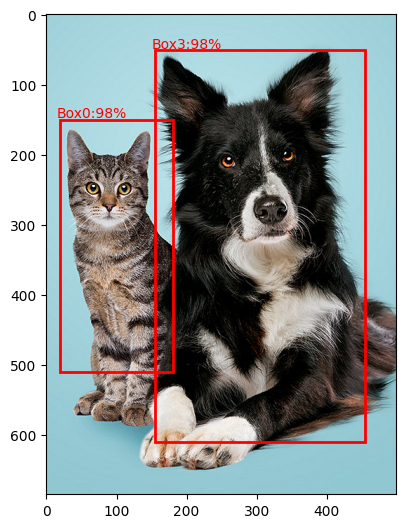

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image = plt.imread('cat_dog.jpg')

# drawing the emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plotting the image
plt.imshow(image)
      
# create the rectangular patch
rect_0 = patches.Rectangle((20, 150), 160, 360, edgecolor='red', facecolor='none', linewidth=2)
rect_3 = patches.Rectangle((155, 50), 300, 560, edgecolor='red', facecolor='none', linewidth=2)
    
# adding the patch
ax.add_patch(rect_0)
ax.text(15, 146, 'Box0:98%', color='red')

ax.add_patch(rect_3)
ax.text(150, 48, 'Box3:98%', color='red')


# showing the figure
plt.show()